In [1]:
# import libraries / packages
import pandas as pd
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

In [2]:
#Load Data
df = pd.read_csv("/Users/henryasiamah/Desktop/work/TM_corpus_new_henry.csv")
df.head()

,Date,Source,Country/Organization,TM_corpus
0,2024-06-07,BBC,UK,many people cross channel small boat many clai...
1,2024-06-07,BBC,UK,right eye europe vote surge ditch german party...
2,2024-06-07,BBC,UK,greek court throw shipwreck trial nine court g...
3,2024-06-07,BBC,UK,cross channel consecutive small boat crossed c...
4,2024-06-07,BBC,UK,people arrive small boat total people detected...


In [3]:
#checking a random row
df.at[2645, 'TM_corpus']

'home office revealed routinely inform family member asylum seeker care supply detail death publicly case upset endangers mental health disclosure come time death cause doubling number suicide period least people taking life people died home office accommodation double died ngo recently warned asylum seeker particularly high risk suicide part home office policy introduction mass accommodation site wethersfield essex bibby stockholm barge portland dorset home office confirmed making le information death available previously information practice notifying loved one death emerged ruling home office information commissioner office civil fleet news blog focus support rescue support mission across europe regularly applies data asylum seeker death freedom information rule home office provided information five death accommodation january june last year confirmed suicide refused provide detail gender nationality citing section freedom information giving right withhold information likely endange

## Implementing LDA Topic Modeling Using Gensim

In [4]:
# Tokenize the text in 'TM_corpus' column
df['TM_corpus_tokenized'] = df['TM_corpus'].apply(lambda x: word_tokenize(x) if isinstance(x, str) else x)

# Convert column 'TM_corpus_tokenized' to a list of tokenized documents
documents = df['TM_corpus_tokenized'].tolist()

# Create a Gensim dictionary and BoW corpus
dictionary = Dictionary(documents)
corpus = [dictionary.doc2bow(doc) for doc in documents]

# Build the LDA model
lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=5,
    random_state=42,
    passes=10,
    alpha='auto',
    per_word_topics=True
)

# Print the topics
for idx, topic in lda_model.print_topics(num_words=10):
    print(f"Topic {idx}: {topic}")

# Visualize the topics using pyLDAvis
pyLDAvis.enable_notebook()  # Use this only in notebooks; remove for scripts
lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_vis)

# Save visualization as HTML
pyLDAvis.save_html(lda_vis, 'lda_visualisation.html')

Topic 0: 0.012*"people" + 0.006*"say" + 0.006*"year" + 0.005*"boat" + 0.005*"life" + 0.004*"child" + 0.004*"time" + 0.003*"family" + 0.003*"many" + 0.003*"police"
Topic 1: 0.010*"year" + 0.010*"worker" + 0.009*"people" + 0.008*"government" + 0.007*"country" + 0.006*"work" + 0.006*"number" + 0.005*"labour" + 0.004*"visa" + 0.004*"asylum"
Topic 2: 0.009*"border" + 0.008*"country" + 0.007*"state" + 0.007*"european" + 0.006*"president" + 0.006*"trump" + 0.005*"minister" + 0.005*"right" + 0.005*"biden" + 0.005*"people"
Topic 3: 0.011*"people" + 0.009*"child" + 0.008*"asylum" + 0.008*"family" + 0.007*"border" + 0.007*"home" + 0.007*"ukrainian" + 0.005*"country" + 0.005*"government" + 0.005*"seeker"
Topic 4: 0.012*"government" + 0.011*"people" + 0.011*"asylum" + 0.010*"home" + 0.007*"australia" + 0.007*"office" + 0.007*"seeker" + 0.006*"minister" + 0.005*"detention" + 0.004*"say"


In [5]:
# Assign topics to each document based on the highest probability
# Assign the most probable topic to each document
df['Topic'] = [max(lda_model.get_document_topics(doc), key=lambda x: x[1])[0] for doc in corpus]

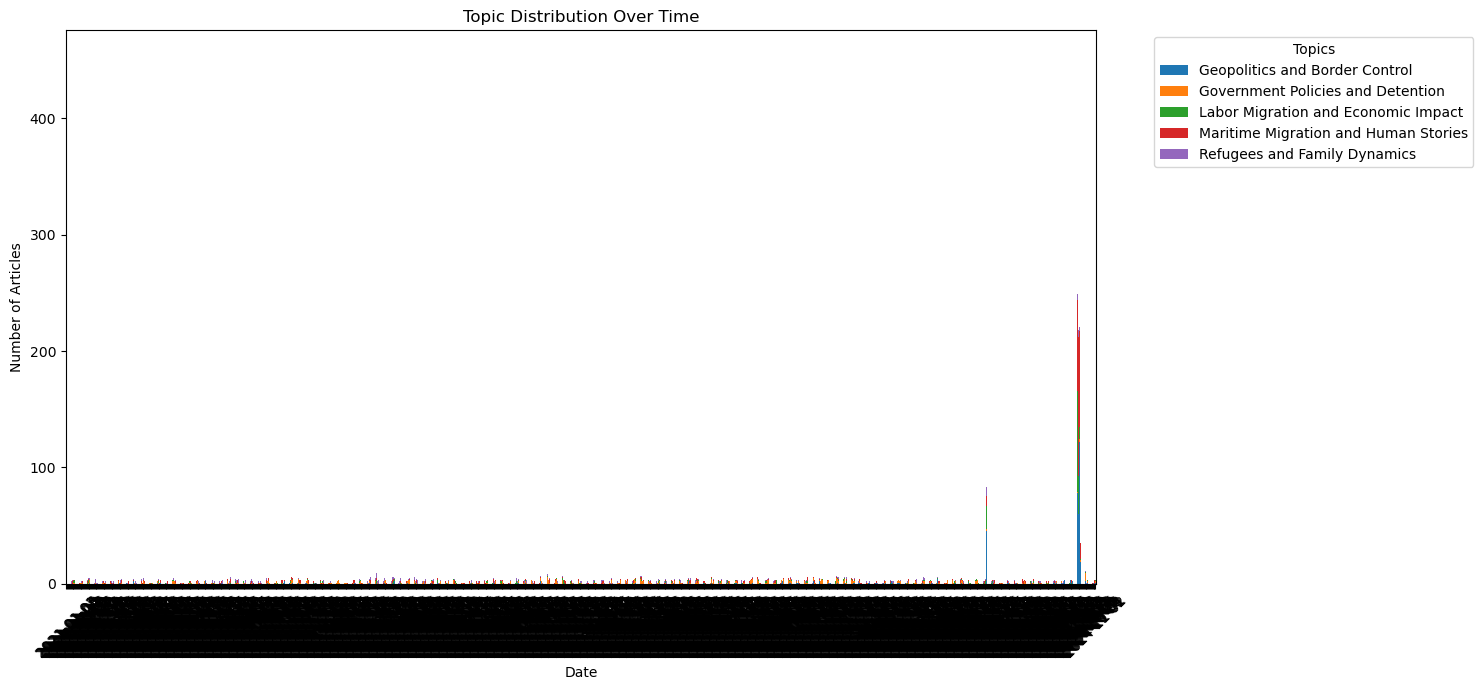

In [6]:
# Define the descriptive topic names
topic_names = {
    0: "Maritime Migration and Human Stories",
    1: "Labor Migration and Economic Impact",
    2: "Geopolitics and Border Control",
    3: "Refugees and Family Dynamics",
    4: "Government Policies and Detention"
}

# Map the topic IDs to their names
df['Topic_Name'] = df['Topic'].map(topic_names)

# Group data by Date and Topic_Name
topic_date_distribution = df.groupby(['Date', 'Topic_Name']).size().unstack(fill_value=0)

# Plot the distribution
topic_date_distribution.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('Topic Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.legend(title='Topics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

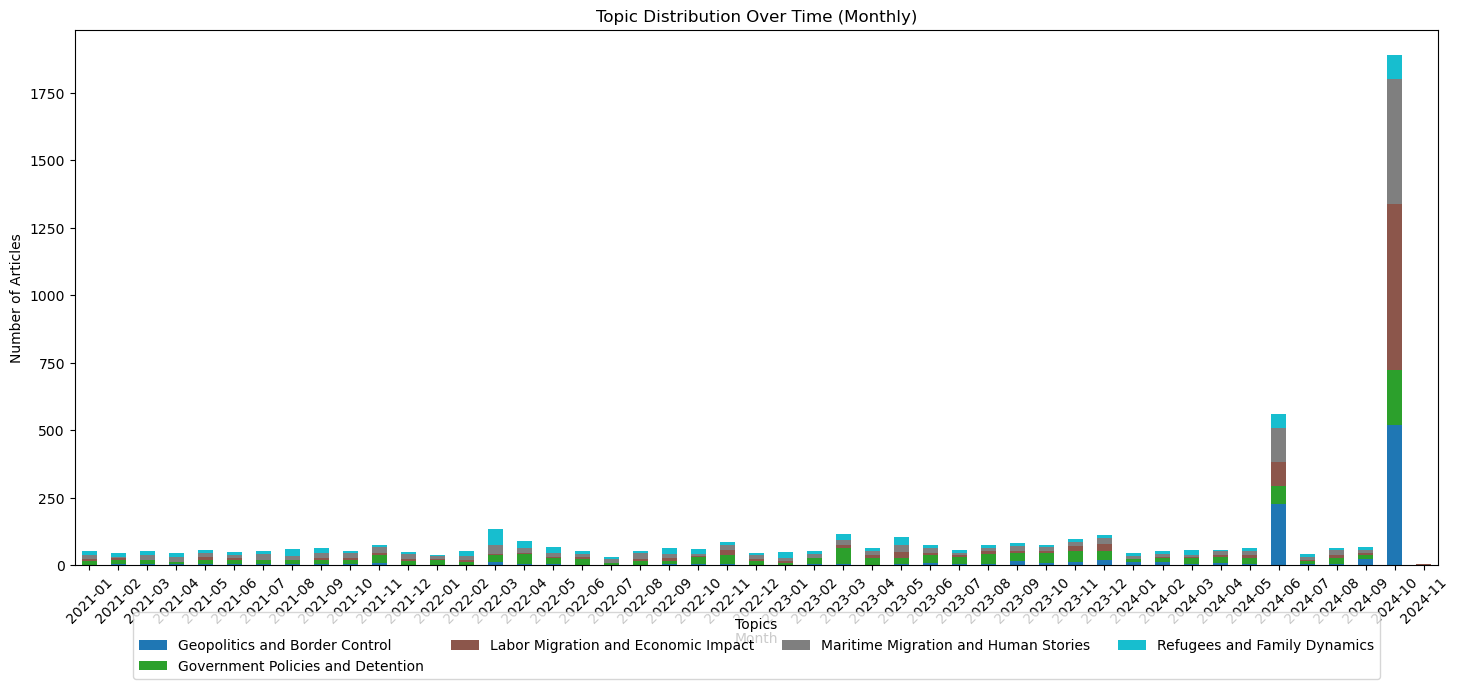

In [7]:
# Convert 'Date' to datetime and group by month
df['Month'] = pd.to_datetime(df['Date']).dt.to_period('M')
topic_month_distribution = df.groupby(['Month', 'Topic_Name']).size().unstack(fill_value=0)

# Plot the distribution
topic_month_distribution.plot(kind='bar', stacked=True, figsize=(15, 7), colormap='tab10')
plt.title('Topic Distribution Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Number of Articles')

# Adjust the legend to show at the bottom
plt.legend(
    title='Topics', 
    bbox_to_anchor=(0.5, -0.15), 
    loc='center', 
    ncol=4  # Adjust the number of columns in the legend if necessary
)

plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig("/Users/henryasiamah/Desktop/work/plot.png")
plt.show()

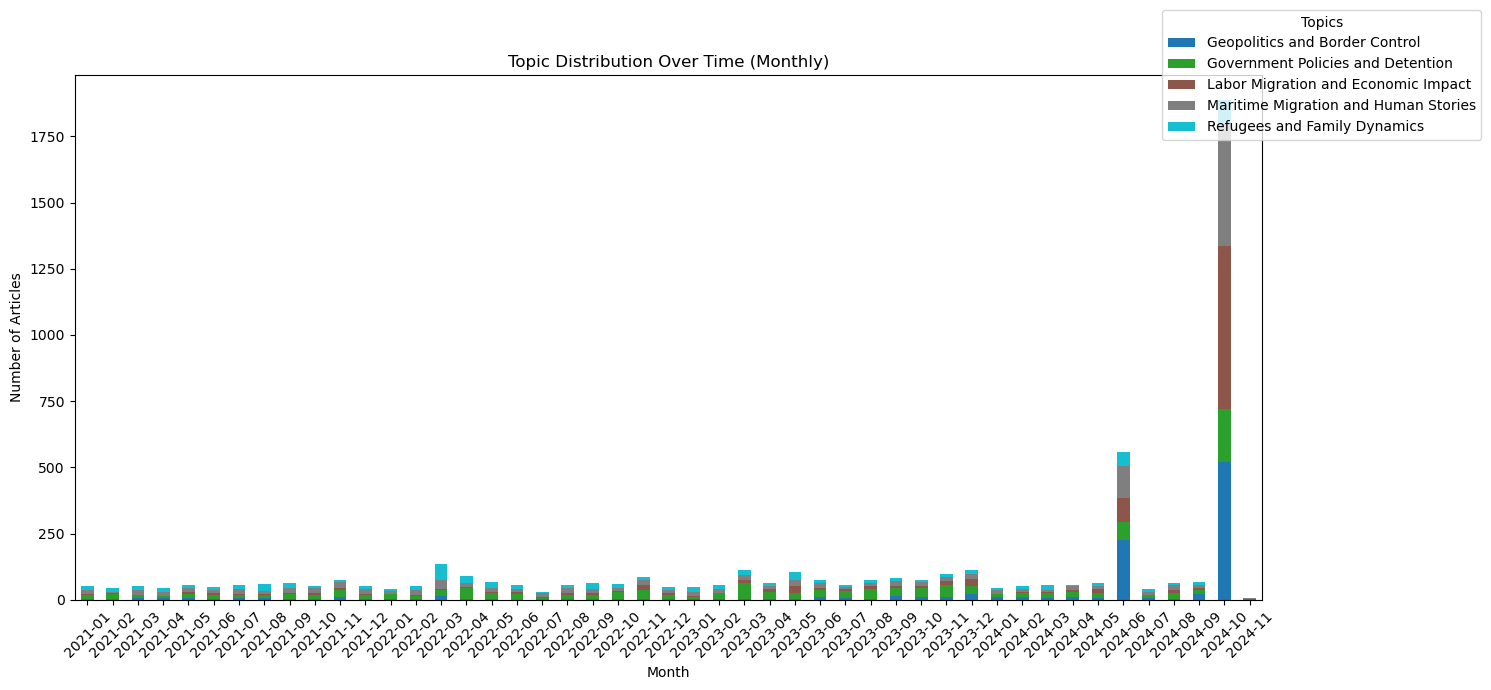

In [8]:
# Convert 'Date' to datetime and group by month
df['Month'] = pd.to_datetime(df['Date']).dt.to_period('M')
topic_month_distribution = df.groupby(['Month', 'Topic_Name']).size().unstack(fill_value=0)

# Plot the distribution
topic_month_distribution.plot(kind='bar', stacked=True, figsize=(15, 7), colormap='tab10')
plt.title('Topic Distribution Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.legend(title='Topics', bbox_to_anchor=(1.05, 1), loc='center')
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig("/Users/henryasiamah/Desktop/work/plot.png")
plt.show()

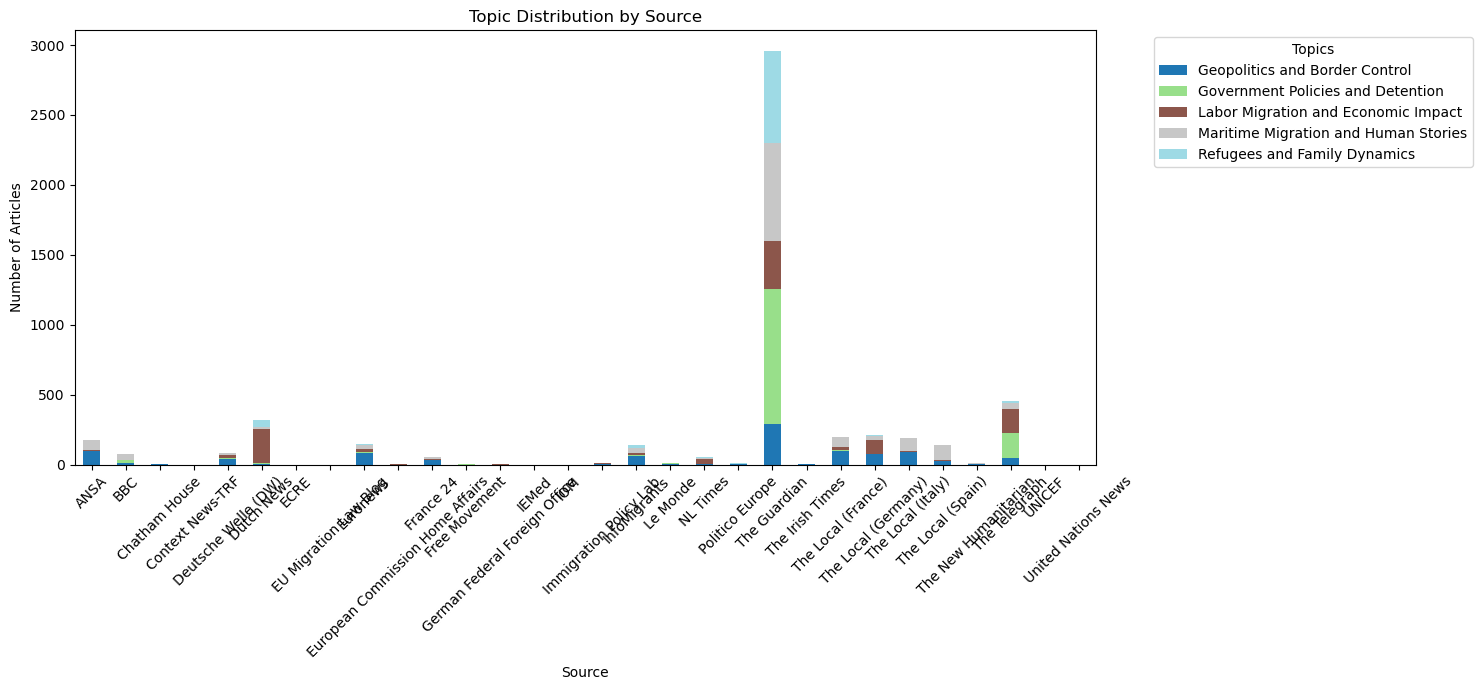

In [9]:
# Group by Source and Topic_Name
topic_source_distribution = df.groupby(['Source', 'Topic_Name']).size().unstack(fill_value=0)

# Plot the distribution
topic_source_distribution.plot(kind='bar', stacked=True, figsize=(15, 7), colormap='tab20')
plt.title('Topic Distribution by Source')
plt.xlabel('Source')
plt.ylabel('Number of Articles')
plt.legend(title='Topics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig("/Users/henryasiamah/Desktop/work/plot.png")
plt.show()

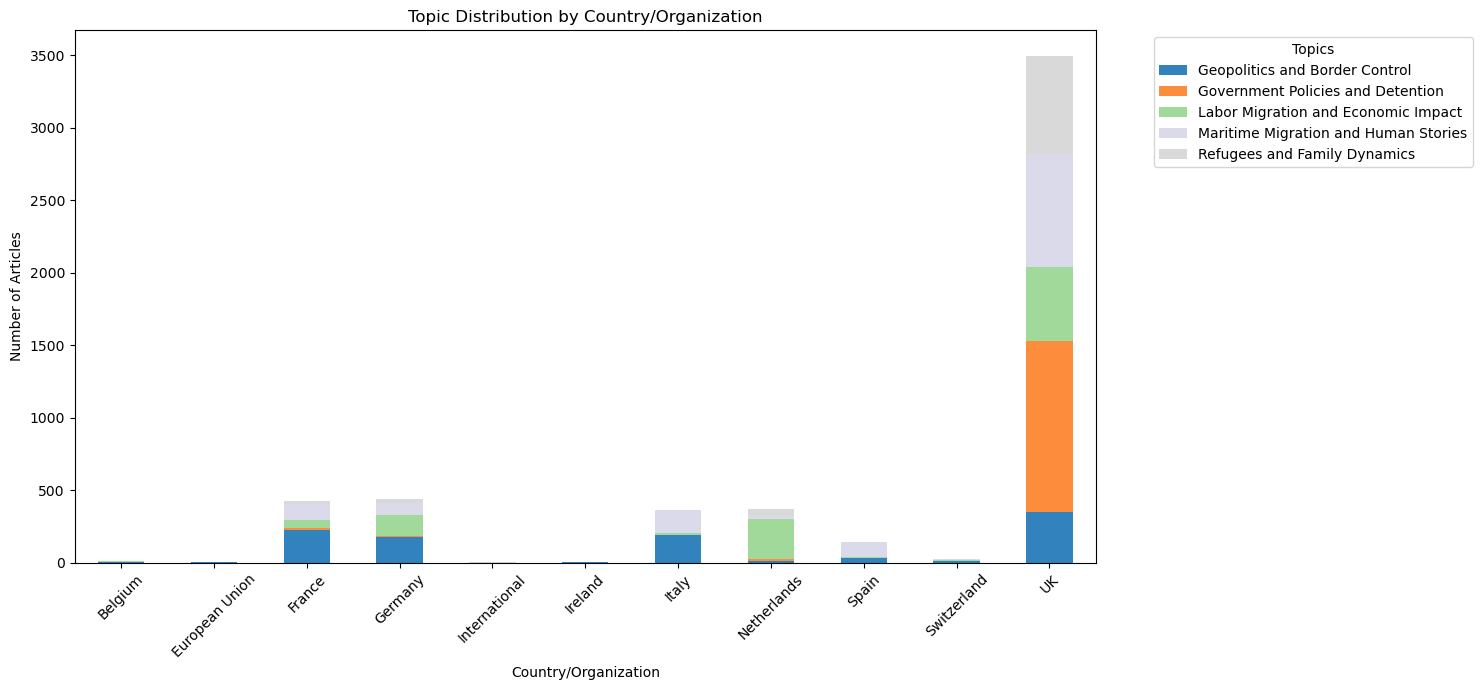

In [10]:
# Group by Country/Organization and Topic_Name
topic_country_distribution = df.groupby(['Country/Organization', 'Topic_Name']).size().unstack(fill_value=0)

# Plot the distribution
topic_country_distribution.plot(kind='bar', stacked=True, figsize=(15, 7), colormap='tab20c')
plt.title('Topic Distribution by Country/Organization')
plt.xlabel('Country/Organization')
plt.ylabel('Number of Articles')
plt.legend(title='Topics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig("/Users/henryasiamah/Desktop/work/plot.png")
plt.show()

In [11]:
df.head()

,Date,Source,Country/Organization,TM_corpus,TM_corpus_tokenized,Topic,Topic_Name,Month
0,2024-06-07,BBC,UK,many people cross channel small boat many clai...,"[many, people, cross, channel, small, boat, ma...",4,Government Policies and Detention,2024-06
1,2024-06-07,BBC,UK,right eye europe vote surge ditch german party...,"[right, eye, europe, vote, surge, ditch, germa...",2,Geopolitics and Border Control,2024-06
2,2024-06-07,BBC,UK,greek court throw shipwreck trial nine court g...,"[greek, court, throw, shipwreck, trial, nine, ...",0,Maritime Migration and Human Stories,2024-06
3,2024-06-07,BBC,UK,cross channel consecutive small boat crossed c...,"[cross, channel, consecutive, small, boat, cro...",4,Government Policies and Detention,2024-06
4,2024-06-07,BBC,UK,people arrive small boat total people detected...,"[people, arrive, small, boat, total, people, d...",4,Government Policies and Detention,2024-06


In [12]:
df['Country/Organization'].value_counts()

Country/Organization
UK                3497
Germany            439
France             423
Netherlands        372
Italy              365
Spain              144
Switzerland         23
Belgium             10
European Union       5
Ireland              3
International        1
Name: count, dtype: int64

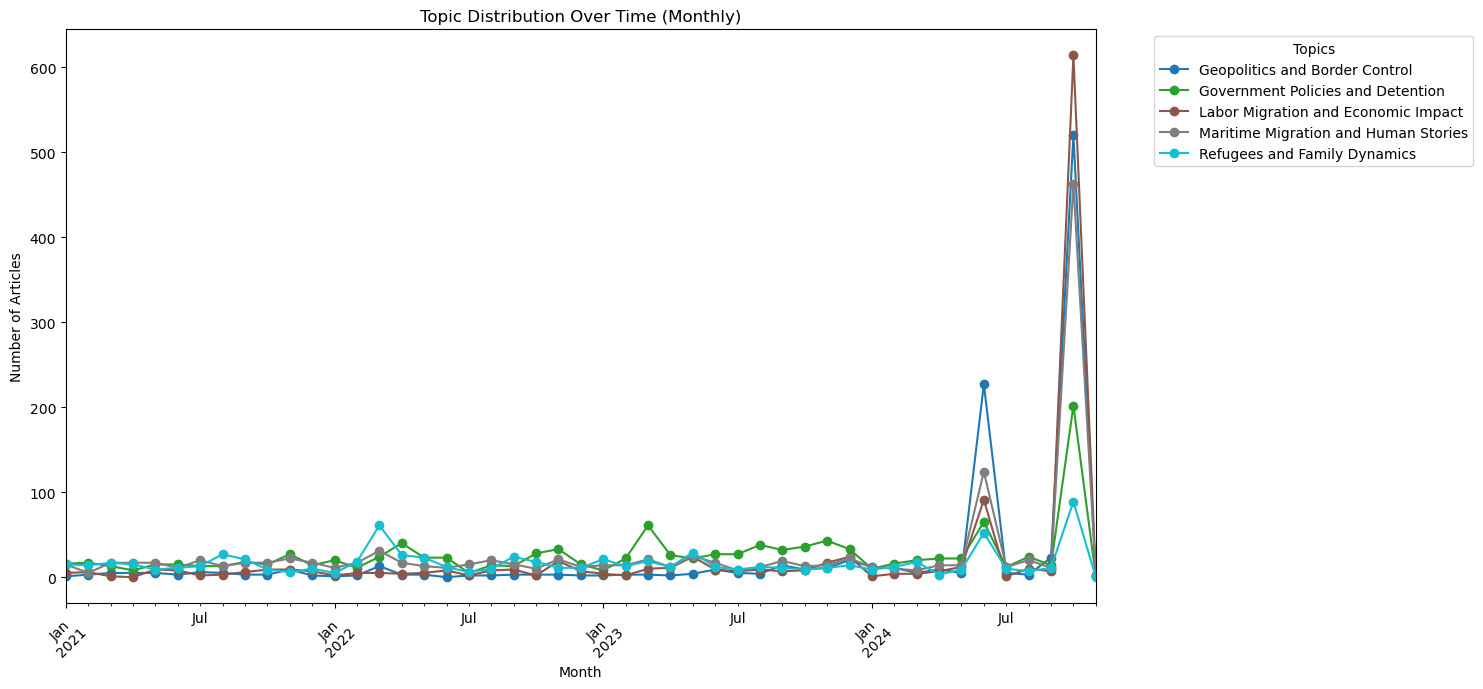

In [13]:
# Convert 'Date' to datetime and group by month
df['Month'] = pd.to_datetime(df['Date']).dt.to_period('M')
topic_month_distribution = df.groupby(['Month', 'Topic_Name']).size().unstack(fill_value=0)

# Plot the distribution as a line graph for months
topic_month_distribution.plot(kind='line', figsize=(15, 7), marker='o', colormap='tab10')
plt.title('Topic Distribution Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.legend(title='Topics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig("/Users/henryasiamah/Desktop/work/plot.png")
plt.show()

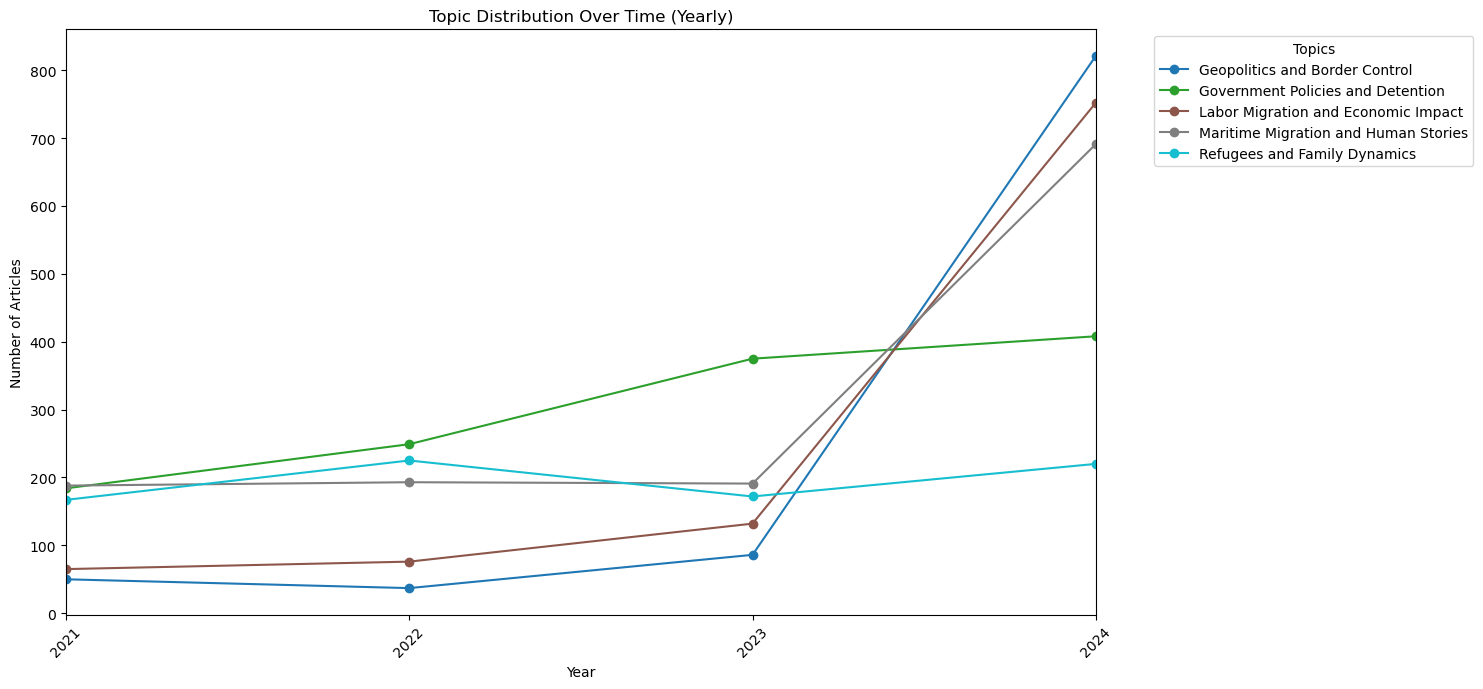

In [14]:
# Convert 'Date' to datetime and group by year
df['Year'] = pd.to_datetime(df['Date']).dt.to_period('Y')
topic_year_distribution = df.groupby(['Year', 'Topic_Name']).size().unstack(fill_value=0)

# Plot the distribution as a line graph for years
topic_year_distribution.plot(kind='line', figsize=(15, 7), marker='o', colormap='tab10')
plt.title('Topic Distribution Over Time (Yearly)')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.legend(title='Topics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig("/Users/henryasiamah/Desktop/work/plot.png")
plt.show()

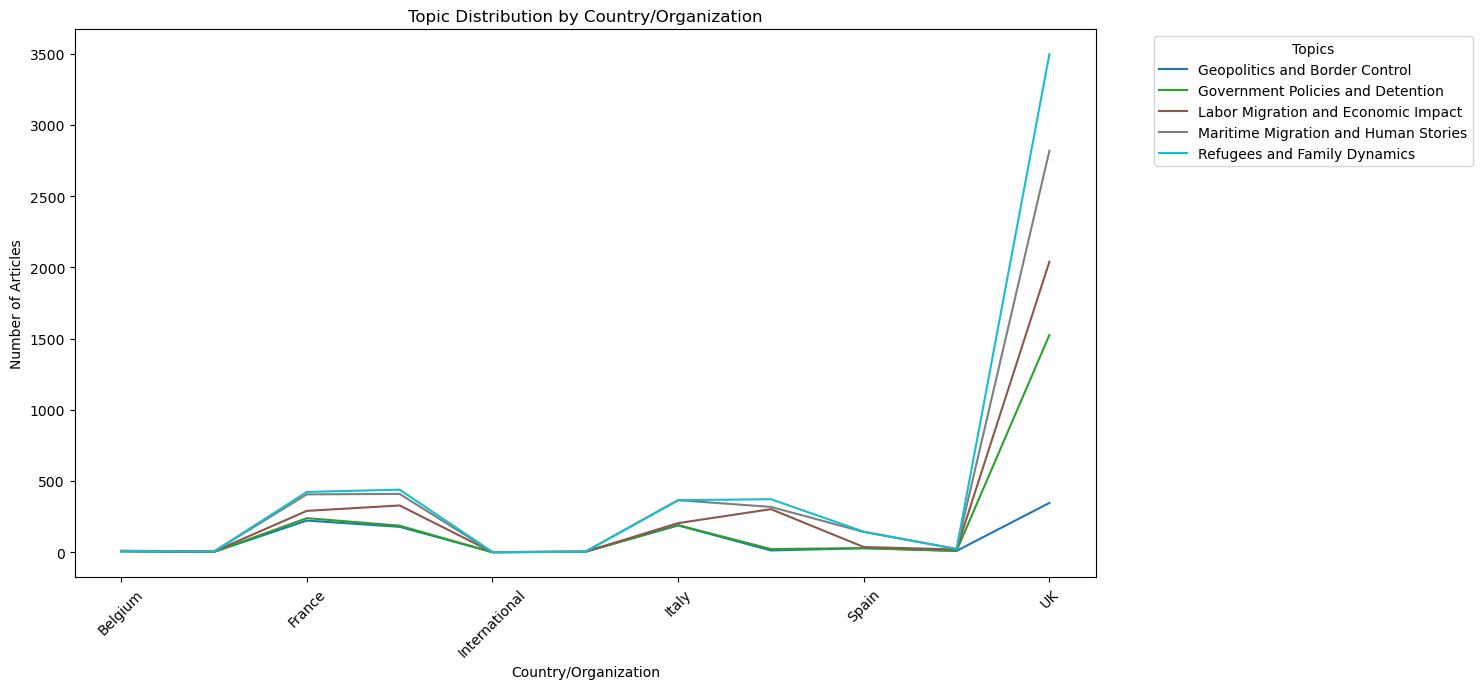

In [15]:
# Group by Country/Organization and Topic_Name
topic_country_distribution = df.groupby(['Country/Organization', 'Topic_Name']).size().unstack(fill_value=0)

# Plot the distribution
topic_country_distribution.plot(kind='line', stacked=True, figsize=(15, 7), colormap='tab10')
plt.title('Topic Distribution by Country/Organization')
plt.xlabel('Country/Organization')
plt.ylabel('Number of Articles')
plt.legend(title='Topics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

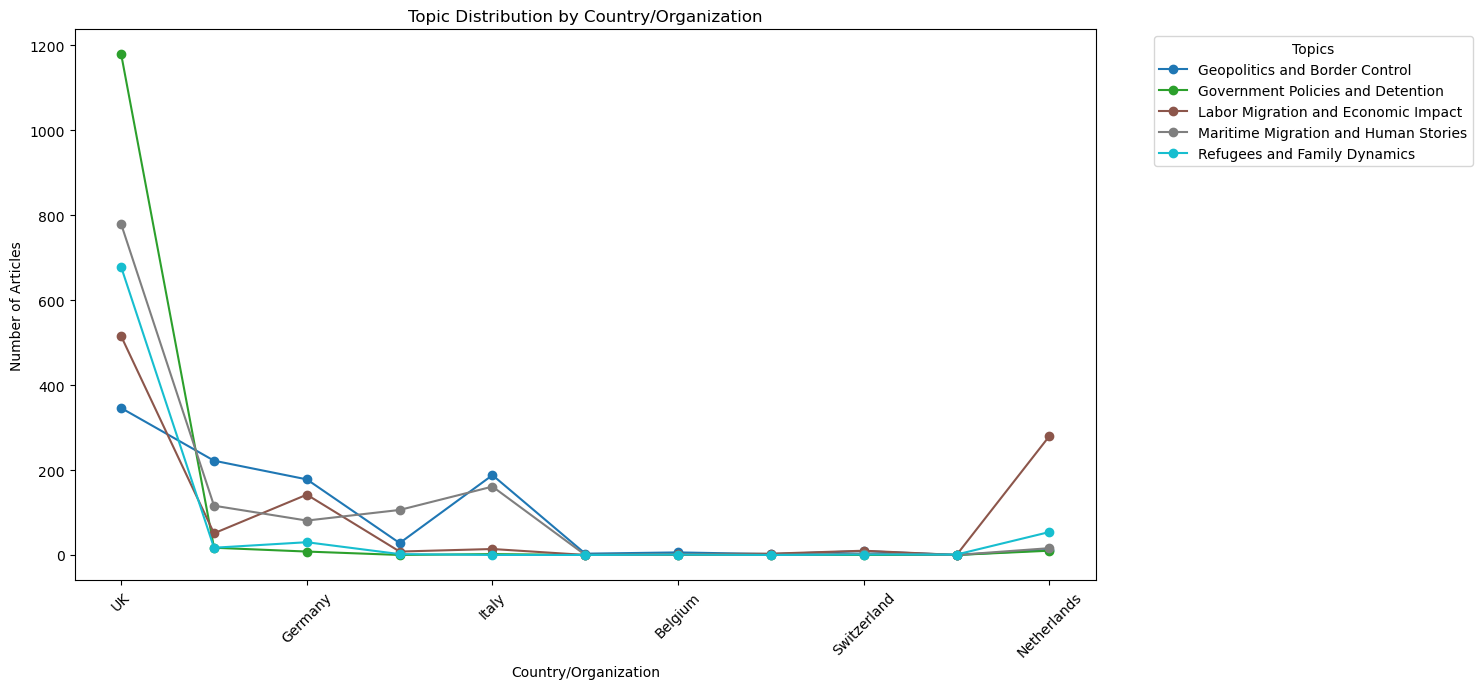

In [16]:
# Reindex to include all possible countries/organizations
all_countries = df['Country/Organization'].unique()
topic_country_distribution = topic_country_distribution.reindex(all_countries, fill_value=0)

# Plot the distribution
topic_country_distribution.plot(kind='line', figsize=(15, 7), marker='o', colormap='tab10')
plt.title('Topic Distribution by Country/Organization')
plt.xlabel('Country/Organization')
plt.ylabel('Number of Articles')
plt.legend(title='Topics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig("/Users/henryasiamah/Desktop/work/plot.png")
plt.show()

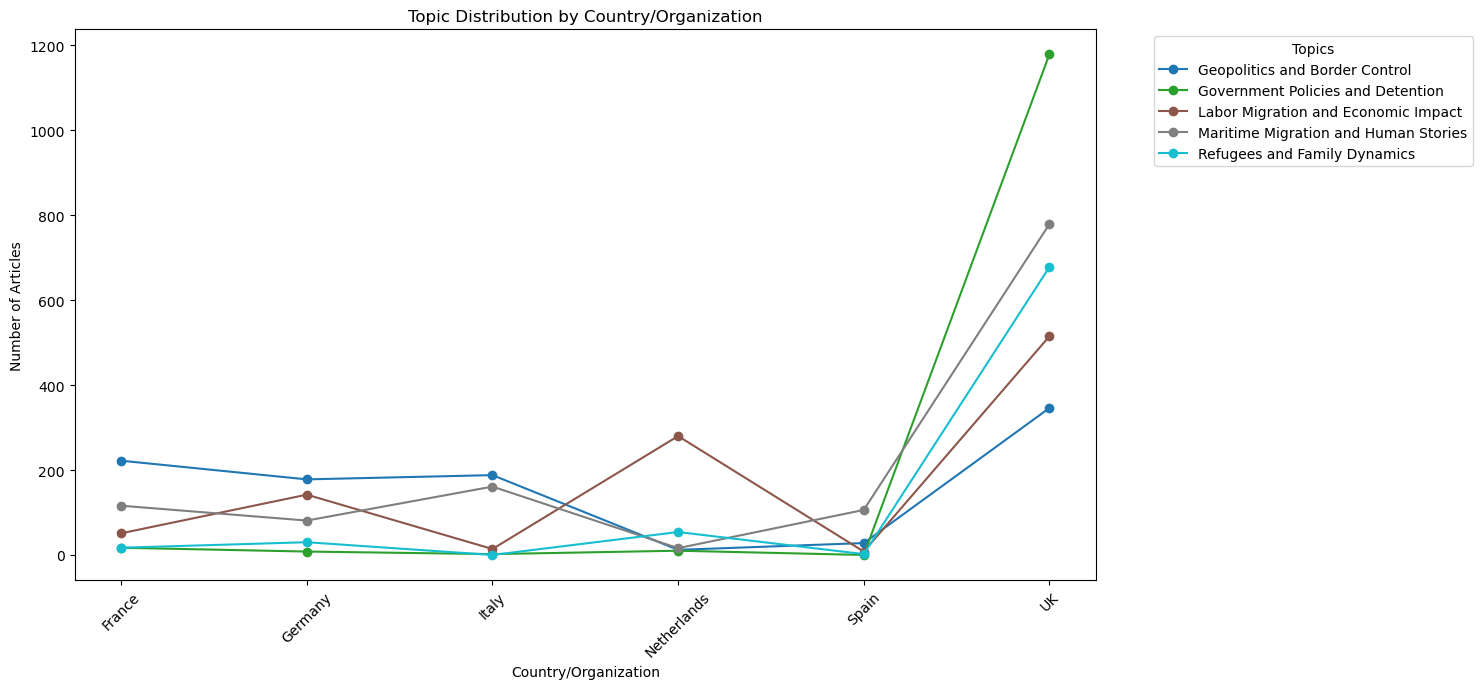

In [17]:
# Define the list of countries to include
selected_countries = ['UK', 'Germany', 'France', 'Italy', 'Netherlands', 'Spain']

# Filter the data for the selected countries
filtered_data = df[df['Country/Organization'].isin(selected_countries)]

# Group by Country/Organization and Topic_Name
topic_country_distribution = filtered_data.groupby(['Country/Organization', 'Topic_Name']).size().unstack(fill_value=0)

# Plot the distribution as a line graph
topic_country_distribution.plot(kind='line', figsize=(15, 7), marker='o', colormap='tab10')
plt.title('Topic Distribution by Country/Organization')
plt.xlabel('Country/Organization')
plt.ylabel('Number of Articles')
plt.legend(title='Topics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig("/Users/henryasiamah/Desktop/work/plot.png")
plt.show()

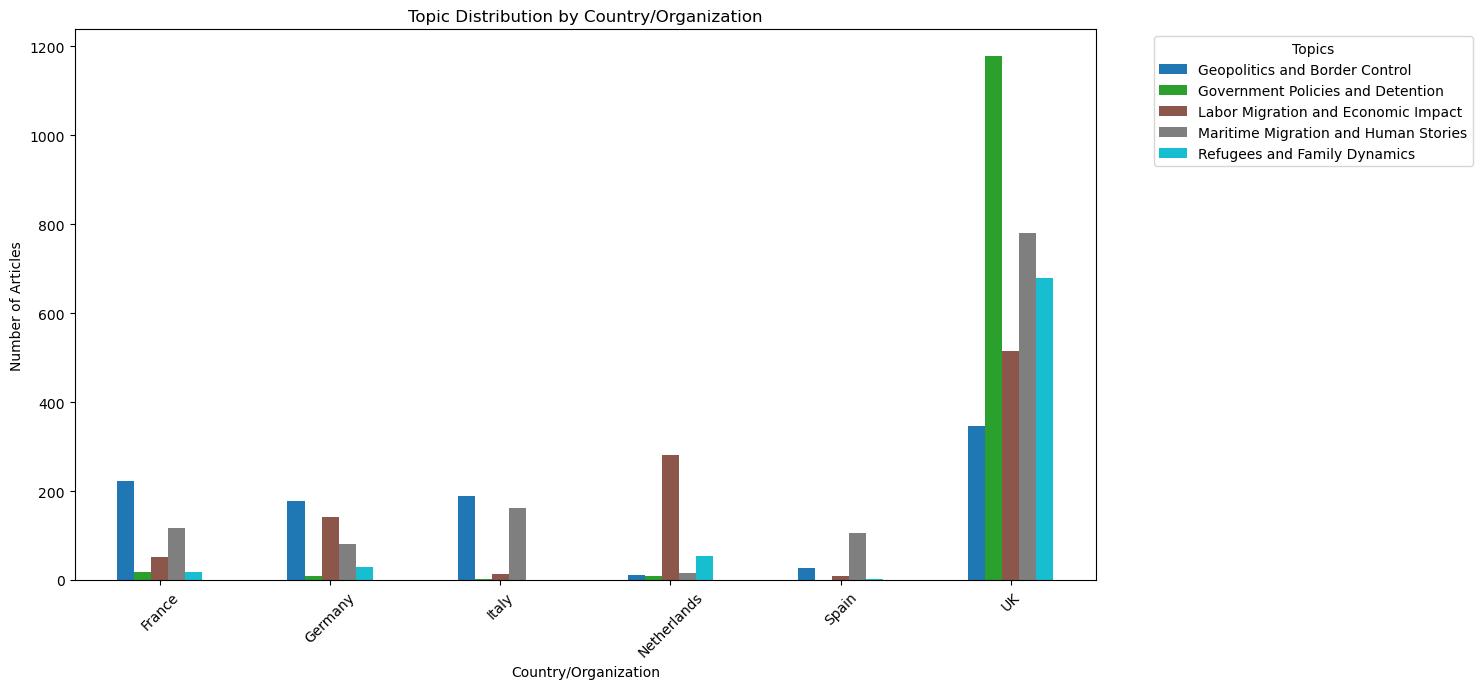

In [18]:
# Define the list of countries to include
selected_countries = ['UK', 'Germany', 'France', 'Italy', 'Netherlands', 'Spain']

# Filter the data for the selected countries
filtered_data = df[df['Country/Organization'].isin(selected_countries)]

# Group by Country/Organization and Topic_Name
topic_country_distribution = filtered_data.groupby(['Country/Organization', 'Topic_Name']).size().unstack(fill_value=0)

# Plot the distribution as a bar graph
topic_country_distribution.plot(kind='bar', figsize=(15, 7), colormap='tab10')
plt.title('Topic Distribution by Country/Organization')
plt.xlabel('Country/Organization')
plt.ylabel('Number of Articles')
plt.legend(title='Topics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("/Users/henryasiamah/Desktop/work/specified_plot.png")
plt.show()

In [19]:
df.head()

,Date,Source,Country/Organization,TM_corpus,TM_corpus_tokenized,Topic,Topic_Name,Month,Year
0,2024-06-07,BBC,UK,many people cross channel small boat many clai...,"[many, people, cross, channel, small, boat, ma...",4,Government Policies and Detention,2024-06,2024
1,2024-06-07,BBC,UK,right eye europe vote surge ditch german party...,"[right, eye, europe, vote, surge, ditch, germa...",2,Geopolitics and Border Control,2024-06,2024
2,2024-06-07,BBC,UK,greek court throw shipwreck trial nine court g...,"[greek, court, throw, shipwreck, trial, nine, ...",0,Maritime Migration and Human Stories,2024-06,2024
3,2024-06-07,BBC,UK,cross channel consecutive small boat crossed c...,"[cross, channel, consecutive, small, boat, cro...",4,Government Policies and Detention,2024-06,2024
4,2024-06-07,BBC,UK,people arrive small boat total people detected...,"[people, arrive, small, boat, total, people, d...",4,Government Policies and Detention,2024-06,2024


In [20]:
df.to_csv("/Users/henryasiamah/Desktop/work/topic_modeling_table.csv")